In [37]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model, model_selection, metrics, pipeline, tree, ensemble, neighbors, svm
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 8)

In [2]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
features = ["SepalLengthCm", "PetalLengthCm"]

In [4]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

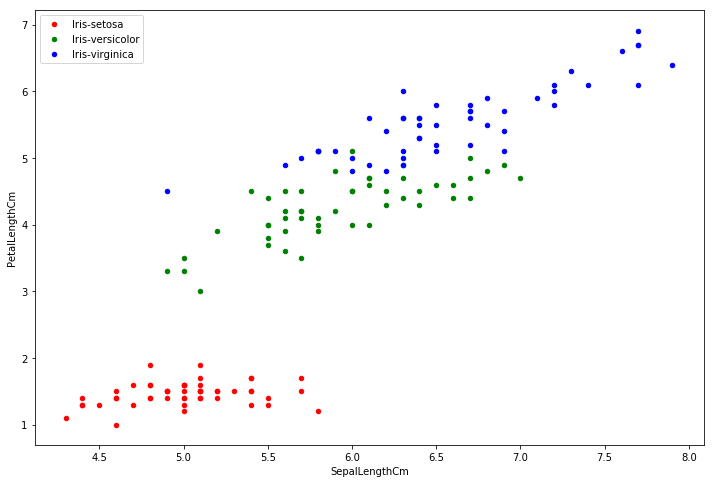

In [12]:
fig, ax = plt.subplots()
colors = ["red", "green", "blue"]
for i, v in enumerate(df.Species.unique()):
    df[df.Species == v][features].plot.scatter(0, 1, ax = ax, color = colors[i], label = v)
plt.legend()

Accuracy: 0.977778
Precision: 0.928571
Recall: 1.000000


Text(0,0.5,'PetalLengthCm')

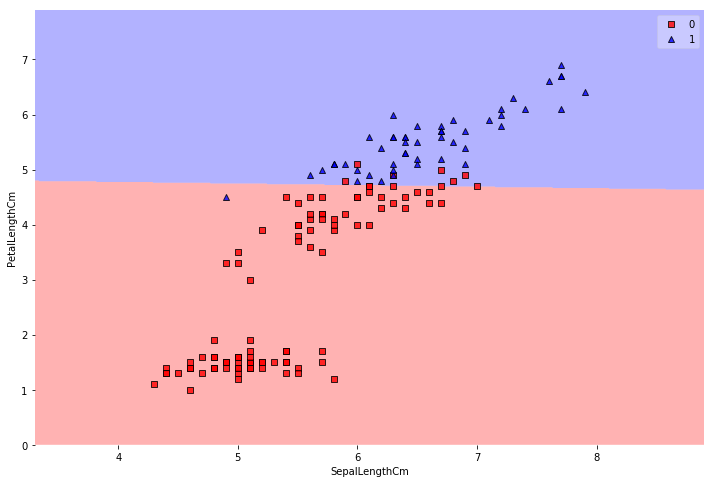

In [18]:
target = "Species"
X = df[features].values
y = np.where(df[target] == "Iris-virginica", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("model", linear_model.LogisticRegression(random_state=1))
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

y_test_prob = est.predict_proba(X_test)[:,1]

print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred)
))

plot_decision_regions(X, y, est)
plt.xlabel(features[0])
plt.ylabel(features[1])

Accuracy: 0.600000
Precision: 0.000000
Recall: 0.000000


/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0,0.5,'PetalLengthCm')

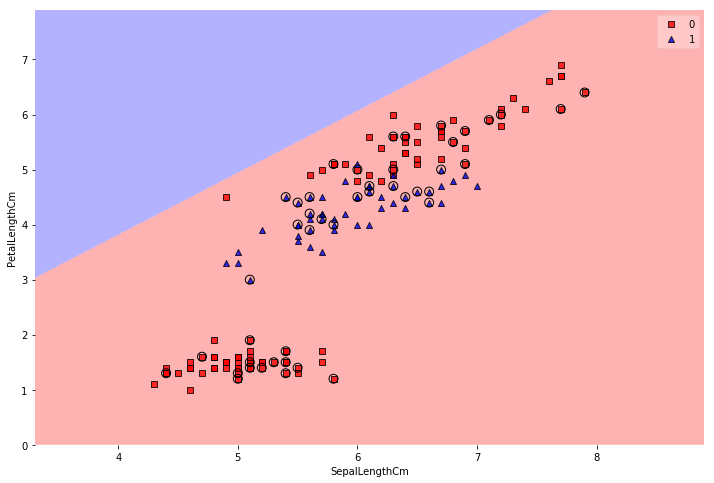

In [22]:
target = "Species"
X = df[features].values
y = np.where(df[target] == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("model", linear_model.LogisticRegression(random_state=1))
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

y_test_prob = est.predict_proba(X_test)[:,1]

print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred)
))

plot_decision_regions(X, y, est, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])


Accuracy: 0.977778
Precision: 0.947368
Recall: 1.000000


Text(0,0.5,'PetalLengthCm')

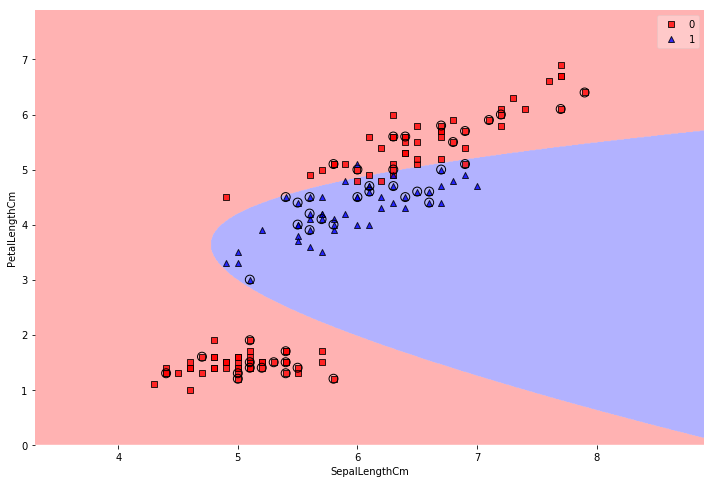

In [27]:
target = "Species"
X = df[features].values
y = np.where(df[target] == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=5, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("model", linear_model.LogisticRegression(random_state=1))
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

y_test_prob = est.predict_proba(X_test)[:,1]

print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred)
))

plot_decision_regions(X, y, est, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])


Accuracy: 0.955556
Precision: 0.944444
Recall: 0.944444


Text(0,0.5,'PetalLengthCm')

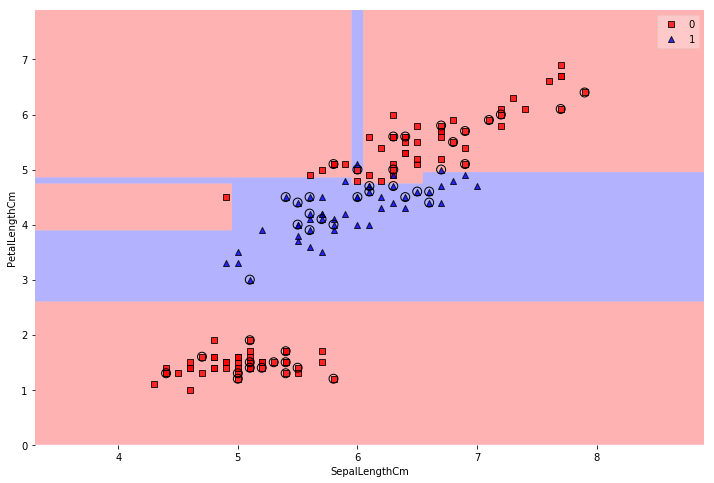

In [29]:
target = "Species"
X = df[features].values
y = np.where(df[target] == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=5, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("model", tree.DecisionTreeClassifier(random_state=1))
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

y_test_prob = est.predict_proba(X_test)[:,1]

print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred)
))

plot_decision_regions(X, y, est, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])


Accuracy: 0.977778
Precision: 1.000000
Recall: 0.944444


Text(0,0.5,'PetalLengthCm')

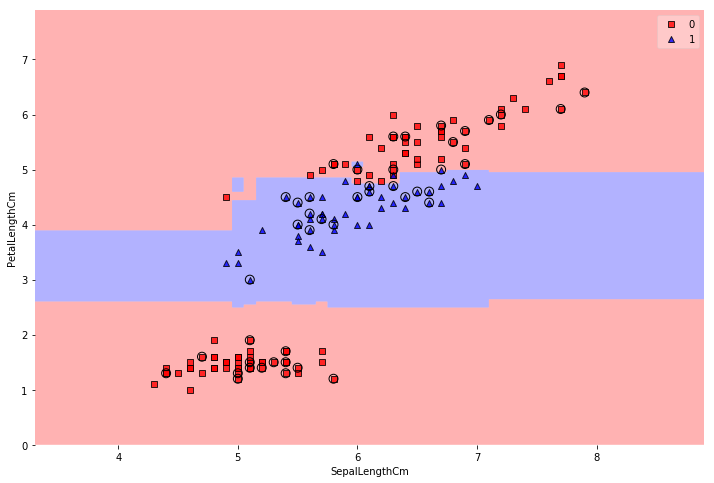

In [33]:
target = "Species"
X = df[features].values
y = np.where(df[target] == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=5, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    ("model", ensemble.RandomForestClassifier(random_state=1, max_depth=10, n_estimators=20))
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

y_test_prob = est.predict_proba(X_test)[:,1]

print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred)
))

plot_decision_regions(X, y, est, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])


Accuracy: 0.977778
Precision: 1.000000
Recall: 0.944444


Text(0,0.5,'PetalLengthCm')

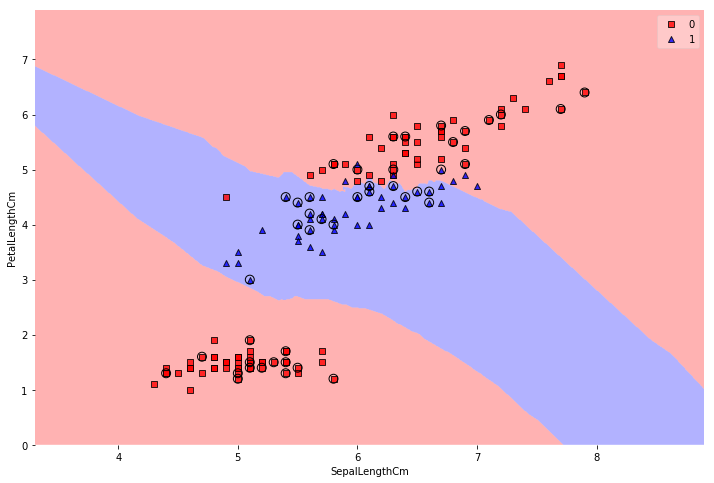

In [63]:
target = "Species"
X = df[features].values
y = np.where(df[target] == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=5, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("model", neighbors.KNeighborsClassifier(n_neighbors=10))
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X[:10])
y_test_pred = est.predict(X_test)

y_test_prob = est.predict_proba(X_test)[:,1]

print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred)
))

plot_decision_regions(X, y, est, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])


In [57]:
import pickle

In [64]:
with open("knn3.pkl", "wb") as f:
    pickle.dump(est, f)

In [65]:
!ls -lh

total 3352
-rw-r--r--  1 abulbasar  staff   322K Jul 30 11:46 Day 1 - pandas.ipynb
-rw-r--r--  1 abulbasar  staff   176K Jul 31 11:18 Day 1 - regression example.ipynb
-rw-r--r--  1 abulbasar  staff   311K Jul 30 14:48 Day 1 - visualization.ipynb
-rw-r--r--  1 abulbasar  staff   143K Jul 31 17:20 Day 2 - classification.ipynb
-rw-r--r--  1 abulbasar  staff   107K Jul 31 14:08 Day 2 - regression - advanced.ipynb
-rw-r--r--  1 abulbasar  staff   367K Aug  2 10:59 Day 3 - no linear classifier.ipynb
-rw-r--r--  1 abulbasar  staff   5.2K Aug  2 10:58 knn.pkl
-rw-r--r--  1 abulbasar  staff   5.2K Aug  2 10:59 knn2.pkl
-rw-r--r--  1 abulbasar  staff   5.2K Aug  2 11:00 knn3.pkl
-rw-r--r--  1 abulbasar  staff    23K Jul 31 12:36 model.pkl
-rw-r--r--  1 abulbasar  staff   1.7K Jul 31 17:18 tree.dot
-rw-r--r--  1 abulbasar  staff   150K Jul 31 17:18 tree.png


Accuracy: 0.977778
Precision: 1.000000
Recall: 0.944444


Text(0,0.5,'PetalLengthCm')

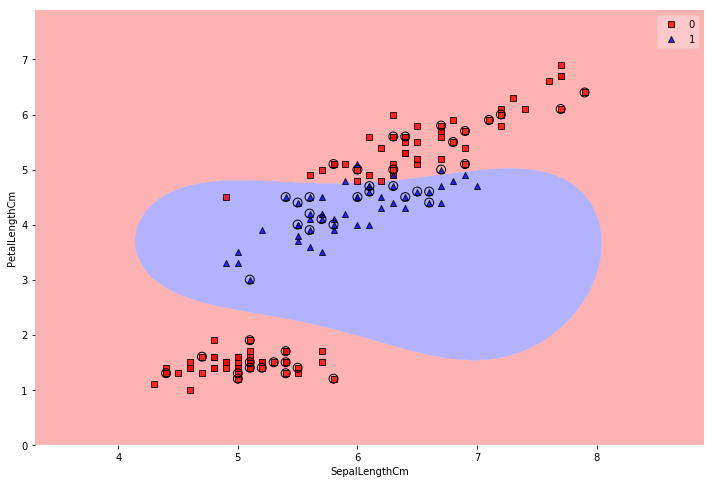

In [41]:
target = "Species"
X = df[features].values
y = np.where(df[target] == "Iris-versicolor", 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=5, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("model", svm.SVC())
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

#y_test_prob = est.predict_proba(X_test)[:,1]

print("Accuracy: %f\nPrecision: %f\nRecall: %f" % (
    metrics.accuracy_score(y_test, y_test_pred),
    metrics.precision_score(y_test, y_test_pred),
    metrics.recall_score(y_test, y_test_pred)
))

plot_decision_regions(X, y, est, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])


In [49]:
a = np.random.uniform(size = (1000, 100))
a_poly = preprocessing.PolynomialFeatures(degree=2).fit_transform(a)
a_poly.shape

(1000, 5151)

In [51]:
preprocessing.LabelEncoder().fit_transform(df.Species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Accuracy: 0.977778


Text(0,0.5,'PetalLengthCm')

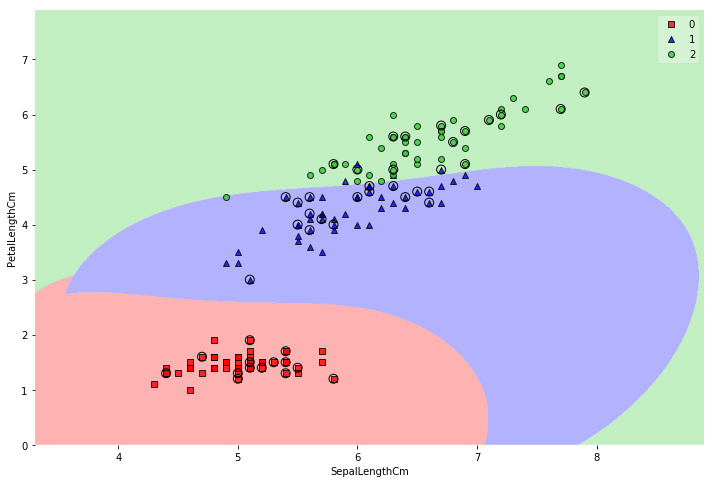

In [54]:
target = "Species"
X = df[features].values
#y = np.where(df[target] == "Iris-versicolor", 1, 0)
y = preprocessing.LabelEncoder().fit_transform(df.Species)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=5, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("model", svm.SVC())
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

#y_test_prob = est.predict_proba(X_test)[:,1]

print("Accuracy: %f" % (
    metrics.accuracy_score(y_test, y_test_pred)
))

plot_decision_regions(X, y, est, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])


Accuracy: 0.955556


Text(0,0.5,'PetalLengthCm')

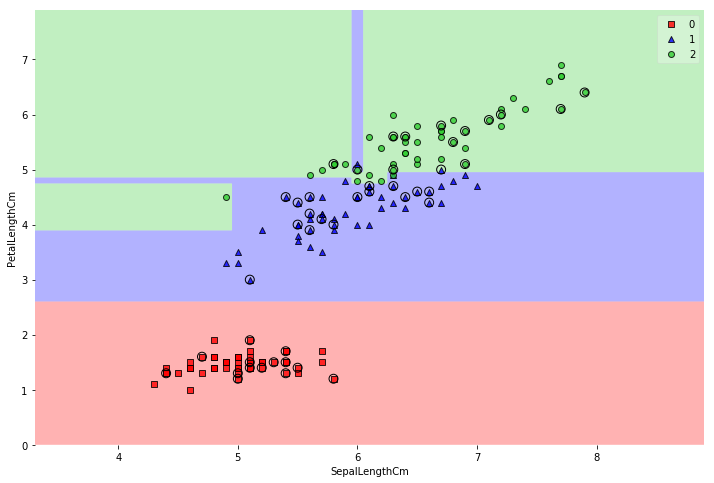

In [55]:
target = "Species"
X = df[features].values
#y = np.where(df[target] == "Iris-versicolor", 1, 0)
y = preprocessing.LabelEncoder().fit_transform(df.Species)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=5, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("model", tree.DecisionTreeClassifier())
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

#y_test_prob = est.predict_proba(X_test)[:,1]

print("Accuracy: %f" % (
    metrics.accuracy_score(y_test, y_test_pred)
))

plot_decision_regions(X, y, est, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])

Accuracy: 1.000000


Text(0,0.5,'PetalLengthCm')

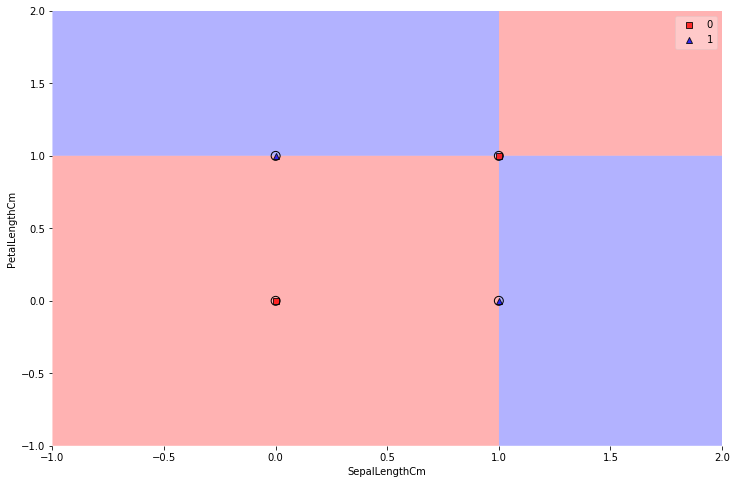

In [69]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])

X_train = X_test = X
y_train = y_test = y

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("model", linear_model.LogisticRegression())
])
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

#y_test_prob = est.predict_proba(X_test)[:,1]

print("Accuracy: %f" % (
    metrics.accuracy_score(y_test, y_test_pred)
))

plot_decision_regions(X, y, est, X_highlight=X_test)
plt.xlabel(features[0])
plt.ylabel(features[1])